In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel(r"C:\Users\acer.DESKTOP-1VQGBE7\OneDrive\Desktop\Coffee Shop Sales.xlsx")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [21]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [30]:
df.tail(10).sort_values(by = 'unit_price',ascending = False)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149109,149450,2023-06-30,20:08:38,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg
149108,149449,2023-06-30,19:57:49,1,3,Astoria,70,3.25,Bakery,Scone,Cranberry Scone
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149107,149448,2023-06-30,19:57:49,2,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg
149110,149451,2023-06-30,20:16:31,2,5,Lower Manhattan,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [62]:
df.groupby('store_location').agg({'store_id':['count']})

,store_id
,count
store_location,
Astoria,50599
Hell's Kitchen,50735
Lower Manhattan,47782


In [66]:
df.groupby('store_location').agg({'unit_price':['mean','sum','max','min']})

unit_price                      
                      mean        sum   max  min
store_location                                  
Astoria           3.384897  171272.41  45.0  0.8
Hell's Kitchen    3.394218  172205.67  45.0  0.8
Lower Manhattan   3.366643  160864.95  45.0  0.8

In [68]:
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [76]:
df.groupby('product_category').agg({'transaction_qty':['sum']})

,transaction_qty
,sum
product_category,
Bakery,23214
Branded,776
Coffee,89250
Coffee beans,1828
Drinking Chocolate,17457
Flavours,10511
Loose Tea,1210
Packaged Chocolate,487


<Axes: xlabel='product_category', ylabel='Unit price'>

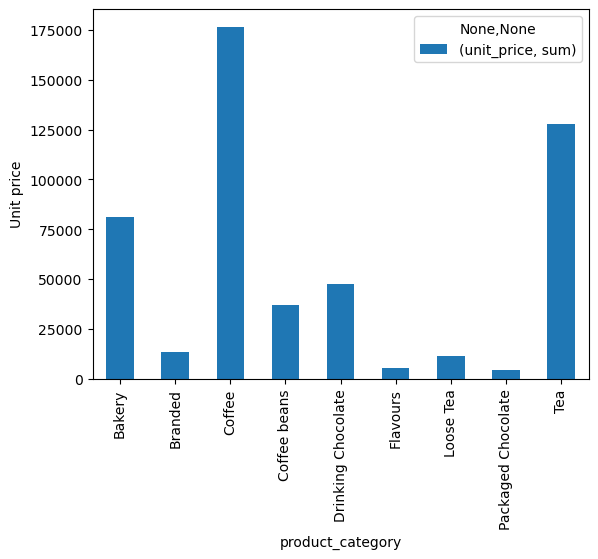

In [137]:
df.groupby('product_category').agg({'unit_price':['sum']}).plot(kind = 'bar',ylabel = 'Unit price')

<Axes: title={'center': 'Average unit price'}, ylabel='mean'>

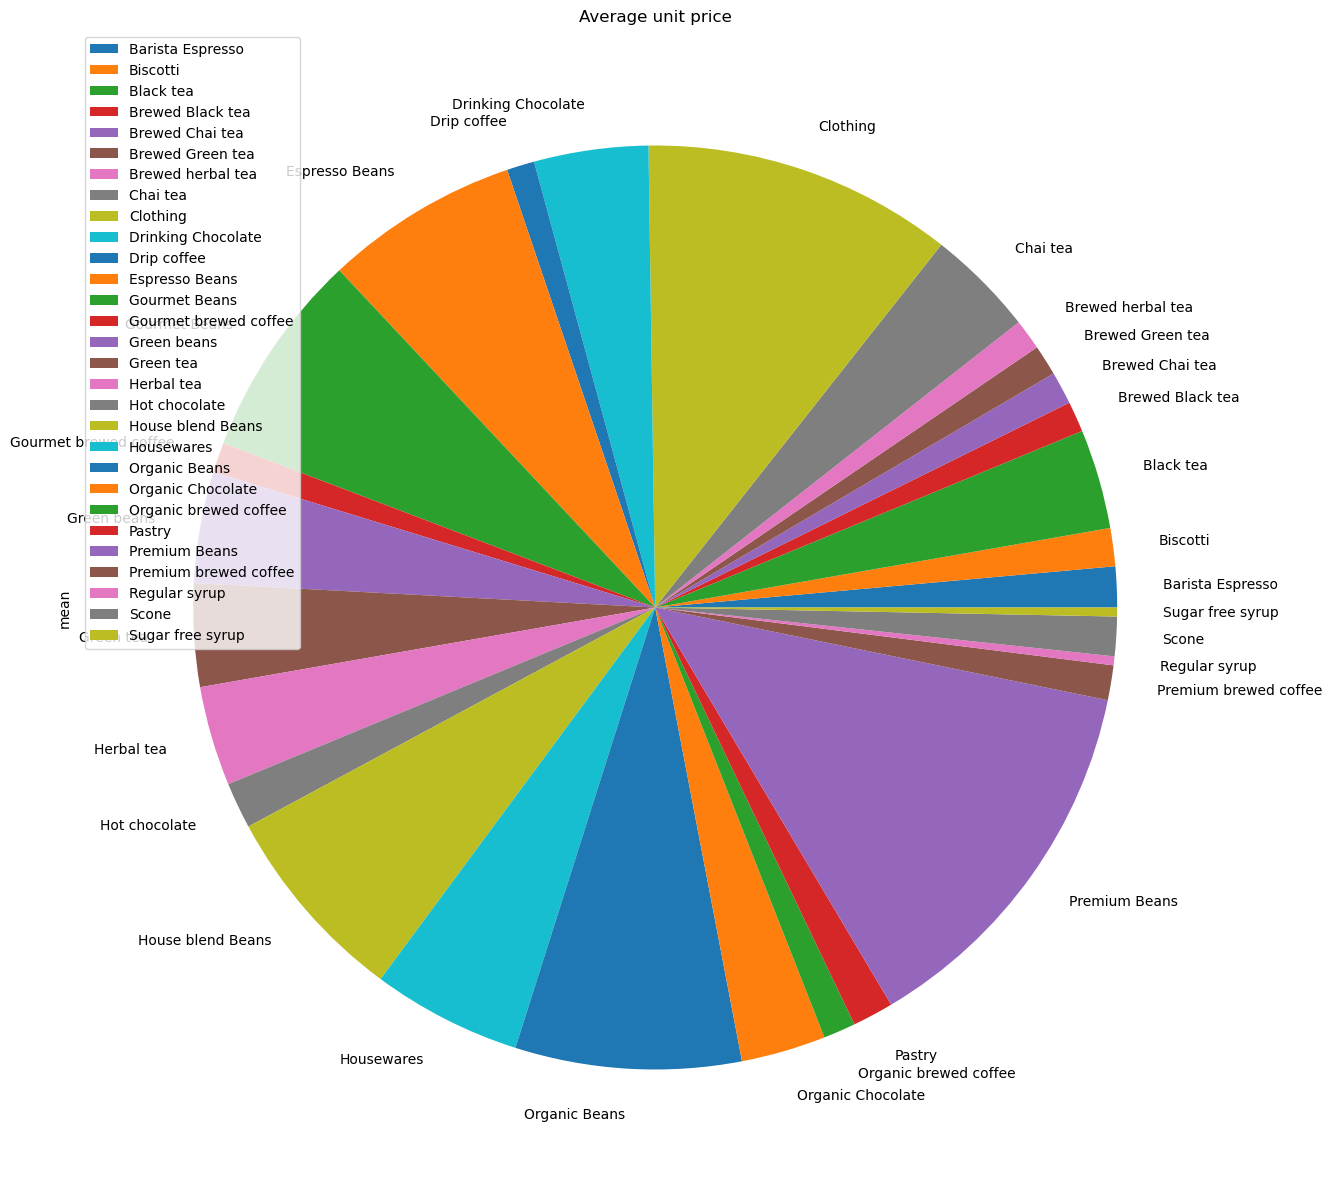

In [108]:
df.groupby('product_type').agg({'unit_price':['mean']}).plot(kind = 'pie',y = 'unit_price',figsize = (15,15),title = 'Average unit price')

<Axes: xlabel='Total orders', ylabel='store_id'>

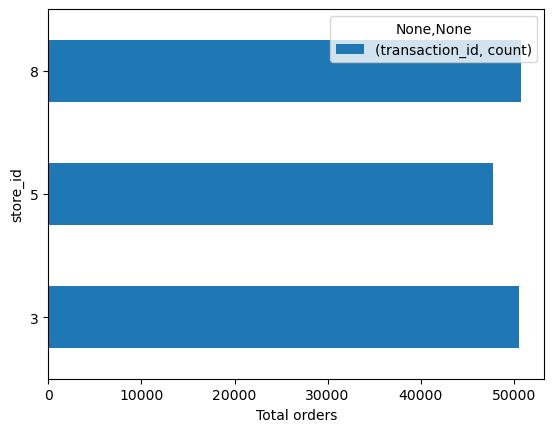

In [139]:
df.groupby('store_id').agg({'transaction_id':['count']}).plot(kind = 'barh',xlabel = 'Total orders')